C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

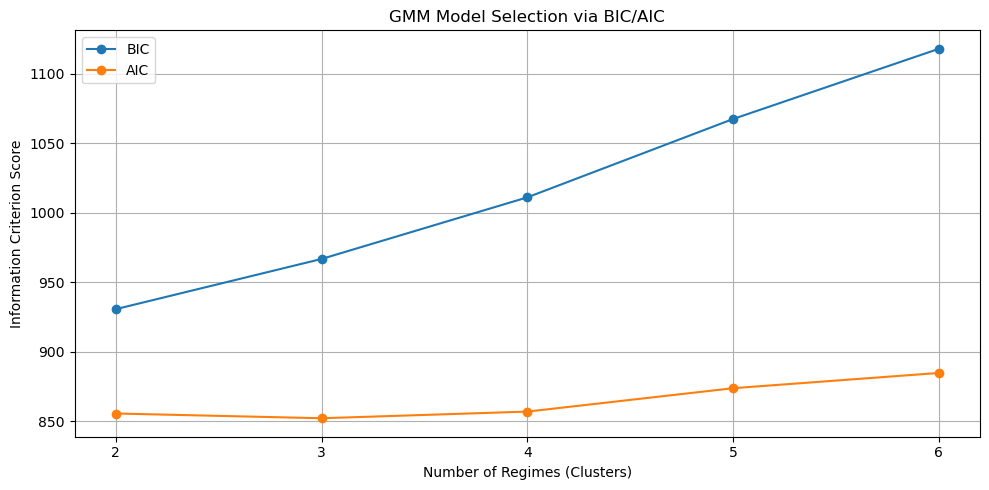

✅ Best number of regimes based on BIC: 2


In [5]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# === Load your composite feature set ===
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Create composite input for GMM
df_features = df[["LeadingScore", "CoincidentScore"]].copy()
df["DiffScore"] = df["LeadingScore"] - df["CoincidentScore"]
df_features["DiffScore"] = df["DiffScore"]

# === Try different cluster counts and store BIC ===
bic_scores = {}
aic_scores = {}
models = {}

range_n = range(2, 7)  # Try 2 to 6 clusters

for n in range_n:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_features)
    bic_scores[n] = gmm.bic(df_features)
    aic_scores[n] = gmm.aic(df_features)
    models[n] = gmm

# === Plot BIC and AIC scores ===
plt.figure(figsize=(10, 5))
plt.plot(range_n, list(bic_scores.values()), marker='o', label="BIC")
plt.plot(range_n, list(aic_scores.values()), marker='o', label="AIC")
plt.xticks(range_n)
plt.xlabel("Number of Regimes (Clusters)")
plt.ylabel("Information Criterion Score")
plt.title("GMM Model Selection via BIC/AIC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Select best model (lowest BIC) ===
best_n = min(bic_scores, key=bic_scores.get)
best_model = models[best_n]
print(f"✅ Best number of regimes based on BIC: {best_n}")

# === Assign final regime labels using best model ===
df["Regime"] = best_model.predict(df_features)


In [20]:

# === Optional: Add probabilities, fingerprint check, and signal logic ===
# (Reuse previous fingerprinting, regime_labeling, and plotting code here)

# Save final file
df.reset_index().to_csv("gmm_best_model_output.csv", index=False)




✅ Results saved to 'zscore_regime_labeled.csv'


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



📊 Regime Fingerprints (means):
        LeadingScore  CoincidentScore  DiffScore
Regime                                          
0              58.89            51.47       7.42
1              53.74            28.83      24.91
2              53.04            56.40      -3.37
3              44.69            55.15     -10.46
4              53.52            73.47     -19.95


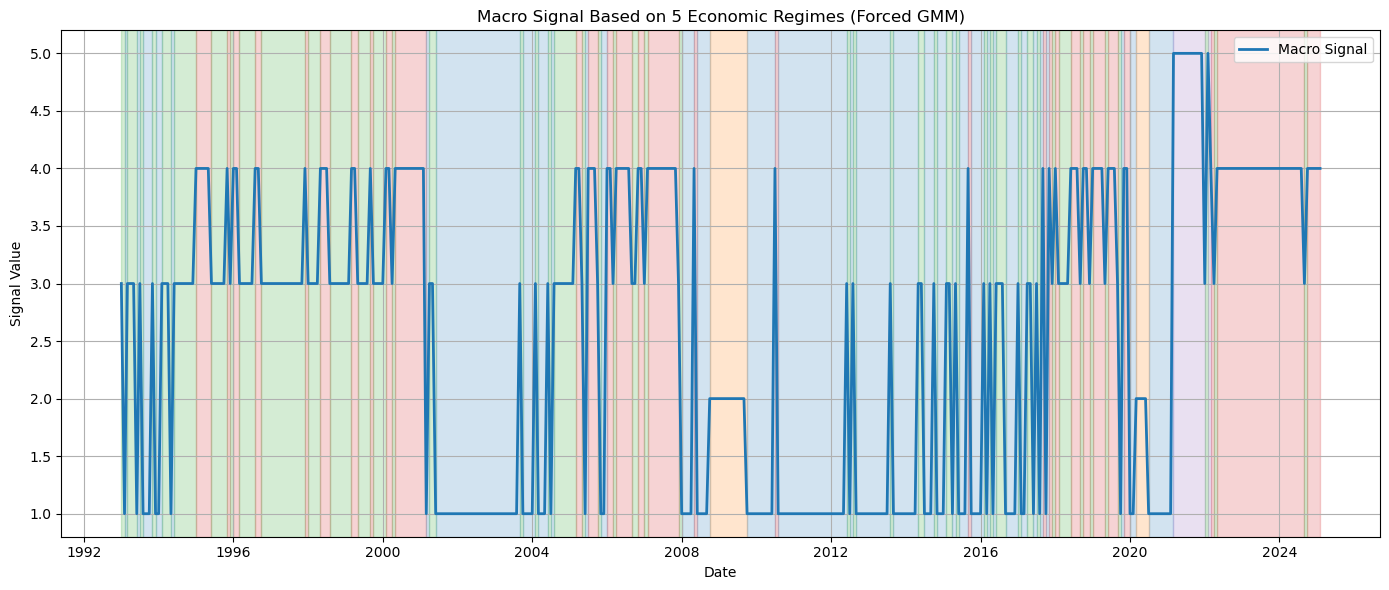

In [7]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 1. Load your composite scores
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# 2. Create the features for GMM
df["DiffScore"] = df["LeadingScore"] - df["CoincidentScore"]
df_features = df[["LeadingScore", "CoincidentScore", "DiffScore"]]

# 3. Force GMM to use 5 components
n_regimes = 5
gmm = GaussianMixture(n_components=n_regimes, random_state=42)
df["Regime"] = gmm.fit_predict(df_features)

# 4. Add soft probabilities (optional but useful)
proba = gmm.predict_proba(df_features)
for i in range(n_regimes):
    df[f"Prob_Regime_{i}"] = proba[:, i]

# 5. View the fingerprints to help label the regimes
print("\n📊 Regime Fingerprints (means):")
fingerprints = df.groupby("Regime")[["LeadingScore", "CoincidentScore", "DiffScore"]].mean().round(2)
print(fingerprints)

# 6. Manually assign regime labels based on fingerprint patterns
# Example structure — modify based on actual output:
regime_labels = {
    0: "Bust",
    1: "Early Recovery",
    2: "Late Recovery",
    3: "Expansion",
    4: "Stagnation"
}
df["Regime_Label"] = df["Regime"].map(regime_labels)

# 7. Add MacroSignal for use in investing logic
macro_signal_map = {
    "Bust": 1,
    "Early Recovery": 2,
    "Late Recovery": 3,
    "Expansion": 4,
    "Stagnation": 5
}
df["MacroSignal"] = df["Regime_Label"].map(macro_signal_map)

# 8. Plot regime transitions
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, df["MacroSignal"], lw=2, label="Macro Signal")
ax.set_title("Macro Signal Based on 5 Economic Regimes (Forced GMM)")
ax.set_xlabel("Date")
ax.set_ylabel("Signal Value")
ax.grid(True)

# Color bands for regimes
prev_regime = None
start_date = None
for date, regime in df["Regime"].items():
    if prev_regime is None:
        prev_regime = regime
        start_date = date
    elif regime != prev_regime:
        ax.axvspan(start_date, date, alpha=0.2, color=f"C{prev_regime}")
        start_date = date
        prev_regime = regime
ax.axvspan(start_date, df.index[-1], alpha=0.2, color=f"C{prev_regime}")

plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
# 9. Save to CSV
df.reset_index().to_csv("gmm_forced_5_regimes_output.csv", index=False)
print("✅ Saved GMM with 5 forced regimes to 'gmm_forced_5_regimes_output.csv'")


In [9]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Step 1: Load your final composite dataset
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Step 2: Prepare features for GMM
# You want to use the composite scores
df["DiffScore"] = df["LeadingScore"] - df["CoincidentScore"]
gmm_features = df[["LeadingScore", "CoincidentScore", "DiffScore"]]

# Step 3: Fit GMM with 5 components (forced)
gmm = GaussianMixture(n_components=5, random_state=42)
df["Regime"] = gmm.fit_predict(gmm_features)

# Step 4: Print regime fingerprints
print("\n📊 Regime Fingerprints (mean scores):")
print(df.groupby("Regime")[["LeadingScore", "CoincidentScore", "DiffScore"]].mean().round(2))

# Step 5 (Optional): Add soft probabilities
proba = gmm.predict_proba(gmm_features)
for i in range(5):
    df[f"Prob_Regime_{i}"] = proba[:, i]




📊 Regime Fingerprints (mean scores):
        LeadingScore  CoincidentScore  DiffScore
Regime                                          
0              58.89            51.47       7.42
1              53.74            28.83      24.91
2              53.04            56.40      -3.37
3              44.69            55.15     -10.46
4              53.52            73.47     -19.95


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [11]:
print(df[["LeadingScore", "CoincidentScore"]].describe())


       LeadingScore  CoincidentScore
count    386.000000       386.000000
mean      52.918738        53.582831
std        6.967378         7.351002
min       32.486874        21.105386
25%       48.381684        50.985283
50%       53.015817        54.228720
75%       57.502238        57.097669
max       71.095708        80.869944


In [ ]:

# Step 6: Save to CSV
df.reset_index().to_csv("gmm_5_cluster_output.csv", index=False)
print("✅ Saved clustered output to 'gmm_5_cluster_output.csv'")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



📊 Regime Fingerprints (Mean Scores):
        LeadingScore  CoincidentScore
Regime                               
0              12.16            16.25
1              12.60            14.80
2              11.05            15.54
3              12.11            10.89
4              12.05            19.21


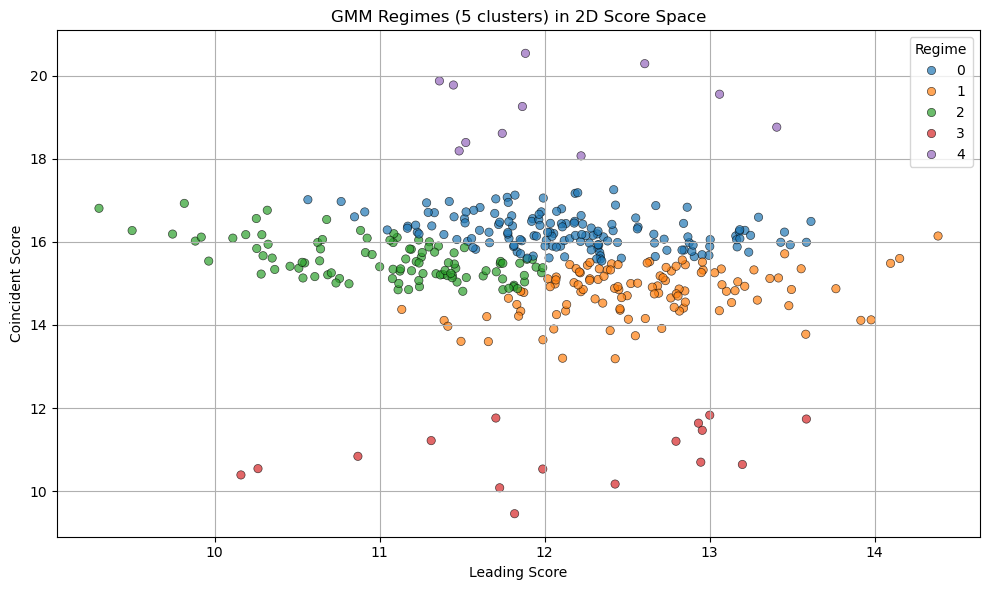

In [22]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Load the composite data
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Choose features: only LeadingScore and CoincidentScore
gmm_features = df[["LeadingScore", "CoincidentScore"]]

# Fit the GMM with 5 components
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df["Regime"] = gmm.fit_predict(gmm_features)

# Optional: Add soft probabilities
proba = gmm.predict_proba(gmm_features)
for i in range(n_clusters):
    df[f"Prob_Regime_{i}"] = proba[:, i]

# Print fingerprints
print("\n📊 Regime Fingerprints (Mean Scores):")
print(df.groupby("Regime")[["LeadingScore", "CoincidentScore"]].mean().round(2))

# =========================
# 🟢 2D Cluster Plot
# =========================
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", n_colors=n_clusters)

sns.scatterplot(
    data=df,
    x="LeadingScore",
    y="CoincidentScore",
    hue="Regime",
    palette=palette,
    alpha=0.7,
    edgecolor='black'
)

plt.title("GMM Regimes (5 clusters) in 2D Score Space")
plt.xlabel("Leading Score")
plt.ylabel("Coincident Score")
plt.legend(title="Regime", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 1. Load your existing composite scores
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# 2. Use only Leading & Coincident for feature space
gmm_features = df[["LeadingScore", "CoincidentScore"]]

# 3. Fit GMM with 5 components
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df["Regime"] = gmm.fit_predict(gmm_features)

# 4. Generate soft probabilities for each regime
proba = gmm.predict_proba(gmm_features)
for i in range(n_clusters):
    df[f"Prob_Regime_{i}"] = proba[:, i]

# 5. Optional: Label regimes based on fingerprint stats
fingerprints = df.groupby("Regime")[["LeadingScore", "CoincidentScore"]].mean().round(2)
print("\n📊 Regime Fingerprints:\n", fingerprints)

# (You assign labels based on these fingerprints)
regime_labels = {
    0: "Recession",
    1: "Recovery",
    2: "Boom",
    3: "Late Cycle",
    4: "Stagnation"
}
df["Regime_Label"] = df["Regime"].map(regime_labels)



📊 Regime Fingerprints:
         LeadingScore  CoincidentScore
Regime                               
0              12.16            16.25
1              12.60            14.80
2              11.05            15.54
3              12.11            10.89
4              12.05            19.21


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: title={'center': 'Regime Probabilities Over Time'}, xlabel='Date'>

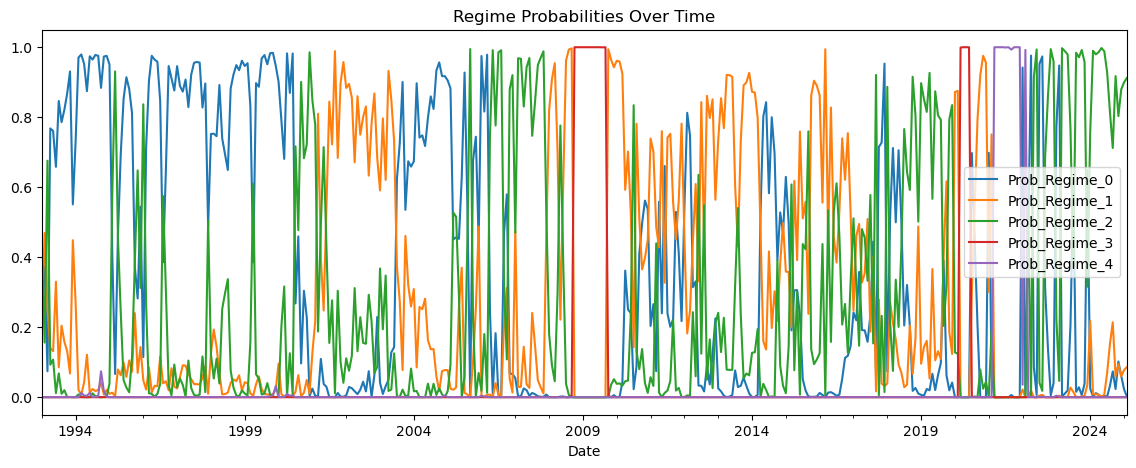

In [26]:
df[[f"Prob_Regime_{i}" for i in range(n_clusters)]].plot(figsize=(14, 5), title="Regime Probabilities Over Time")


In [28]:
df["Regime"].value_counts()


Regime
0    148
1    109
2    102
3     16
4     11
Name: count, dtype: int64

In [30]:
from sklearn.mixture import GaussianMixture

for n in range(2, 6):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_features)
    print(f"{n} Regimes - BIC: {gmm.bic(df_features):,.2f}")


2 Regimes - BIC: -1,976.26
3 Regimes - BIC: -1,940.27
4 Regimes - BIC: -1,886.71
5 Regimes - BIC: -1,834.92


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [13]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load your composite scores
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Create cycle-aware features
df["LeadMinusCoin"] = df["LeadingScore"] - df["CoincidentScore"]
df["LeadMomentum"] = df["LeadingScore"].diff()
df["CoinMomentum"] = df["CoincidentScore"].diff()

# Drop first row (momentum = NaN)
df.dropna(inplace=True)

# Feature set for GMM
features = ["LeadingScore", "CoincidentScore", "LeadMinusCoin", "LeadMomentum", "CoinMomentum"]
gmm_features = df[features]

# Fit GMM with 5 components
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df["Regime"] = gmm.fit_predict(gmm_features)

# Soft probabilities
proba = gmm.predict_proba(gmm_features)
for i in range(n_clusters):
    df[f"Prob_Regime_{i}"] = proba[:, i]

# Print fingerprints for manual labeling
print("\n📊 Regime Fingerprints (Cycle-Aware):")
print(df.groupby("Regime")[features].mean().round(2))





📊 Regime Fingerprints (Cycle-Aware):
        LeadingScore  CoincidentScore  LeadMinusCoin  LeadMomentum  \
Regime                                                               
0              45.42            54.02          -8.60         -2.97   
1              54.13            30.52          23.61         -0.12   
2              58.25            52.08           6.16          1.10   
3              53.07            56.96          -3.89          1.63   
4              52.72            66.14         -13.42         -0.49   

        CoinMomentum  
Regime                
0              -0.06  
1              -1.26  
2              -0.50  
3               0.27  
4               3.61  


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [15]:
fingerprints = df.groupby("Regime")[[
    "LeadingScore", 
    "CoincidentScore", 
    "LeadMinusCoin", 
    "LeadMomentum", 
    "CoinMomentum"
]].mean().round(2)

print("\n📊 Regime Fingerprints:")
print(fingerprints)



📊 Regime Fingerprints:
        LeadingScore  CoincidentScore  LeadMinusCoin  LeadMomentum  \
Regime                                                               
0              45.42            54.02          -8.60         -2.97   
1              54.13            30.52          23.61         -0.12   
2              58.25            52.08           6.16          1.10   
3              53.07            56.96          -3.89          1.63   
4              52.72            66.14         -13.42         -0.49   

        CoinMomentum  
Regime                
0              -0.06  
1              -1.26  
2              -0.50  
3               0.27  
4               3.61  


In [17]:
regime_labels = {
    0: "Late Cycle",
    1: "Early Recovery",
    2: "Overheat",
    3: "Expansion",
    4: "Shock Recovery"
}

df["Regime_Label"] = df["Regime"].map(regime_labels)


In [ ]:
# OPTIONAL: Save to CSV
df.reset_index().to_csv("gmm_cycle_aware_output.csv", index=False)
print("✅ Saved output with cycle-aware GMM regimes.")

C:\Users\user\AppData\Local\Temp\ipykernel_19348\1541202914.py:23: UserWarning: Glyph 128368 (\N{MANTELPIECE CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128368 (\N{MANTELPIECE CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


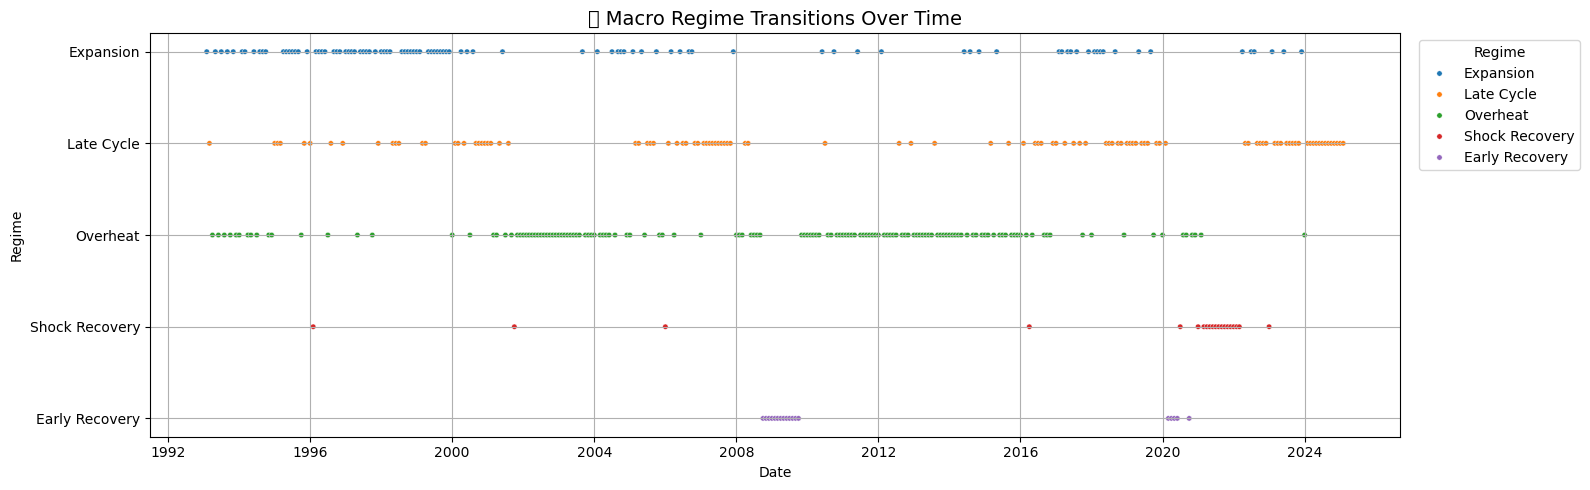

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your 'Date' is the index and regime labels are there
df['Date'] = pd.to_datetime(df.index)  # Just in case
palette = sns.color_palette("tab10", n_colors=len(df["Regime_Label"].unique()))

plt.figure(figsize=(16, 5))
sns.scatterplot(
    x=df['Date'], 
    y=df["Regime_Label"], 
    hue=df["Regime_Label"], 
    palette=palette, 
    legend='full',
    s=15
)

plt.title("🕰️ Macro Regime Transitions Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Regime")
plt.grid(True)
plt.legend(title="Regime", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


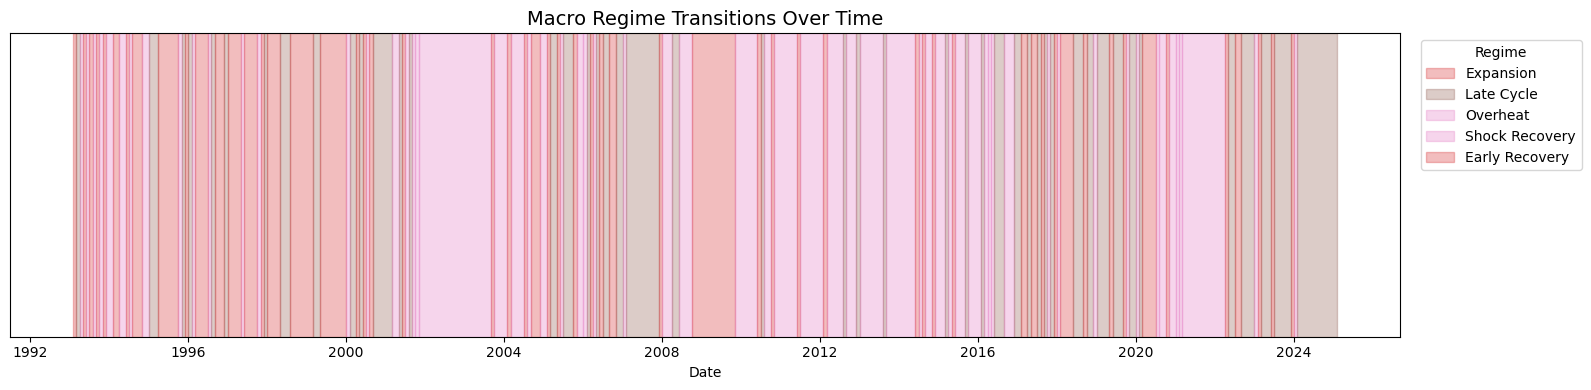

In [21]:
import matplotlib.pyplot as plt

# Reset index if necessary
df = df.copy()
df = df.sort_index()

fig, ax = plt.subplots(figsize=(16, 4))

# Plot dummy line to create a time axis
ax.plot(df.index, [0]*len(df), alpha=0)

# Draw color bands for each regime
prev_regime = None
start_date = None

for date, regime in df["Regime_Label"].items():
    if prev_regime is None:
        prev_regime = regime
        start_date = date
    elif regime != prev_regime:
        ax.axvspan(start_date, date, alpha=0.3, color=f"C{hash(prev_regime)%10}", label=prev_regime)
        start_date = date
        prev_regime = regime

# Final band
ax.axvspan(start_date, df.index[-1], alpha=0.3, color=f"C{hash(prev_regime)%10}", label=prev_regime)

# Formatting
ax.set_title("Macro Regime Transitions Over Time", fontsize=14)
ax.set_xlabel("Date")
ax.set_yticks([])
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), title="Regime", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


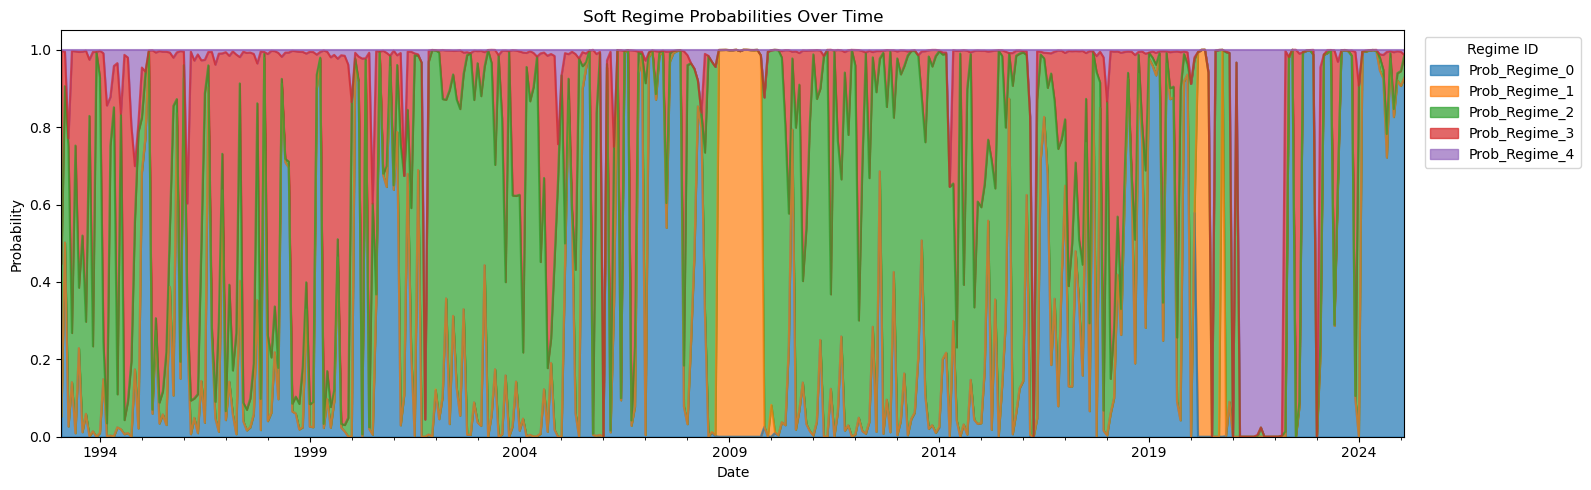

In [23]:
# Only works if you have soft probabilities
proba_cols = [col for col in df.columns if col.startswith("Prob_Regime_")]

# Area plot
df[proba_cols].plot(
    kind='area',
    stacked=True,
    figsize=(16, 5),
    alpha=0.7,
    title="Soft Regime Probabilities Over Time"
)
plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend(title="Regime ID", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


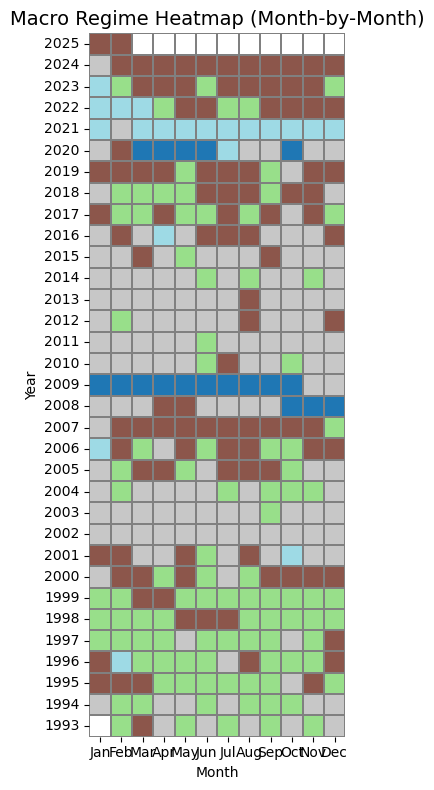

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean and sort
df_heat = df[["Regime_Label"]].dropna().copy()
df_heat["Year"] = df_heat.index.year
df_heat["Month"] = df_heat.index.month
df_heat["MonthStr"] = df_heat.index.strftime("%b")

# Ensure month order
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_heat["MonthStr"] = pd.Categorical(df_heat["MonthStr"], categories=month_order, ordered=True)

# Encode regime as numbers
df_heat["RegimeCode"] = df_heat["Regime_Label"].astype("category").cat.codes

# Pivot
heatmap_data = df_heat.pivot(index="Year", columns="MonthStr", values="RegimeCode").sort_index(ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap="tab20",  # Or your custom palette
    cbar=False,
    linewidths=0.2,
    linecolor='gray',
    square=True
)
plt.title("Macro Regime Heatmap (Month-by-Month)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Figure size 1600x500 with 0 Axes>

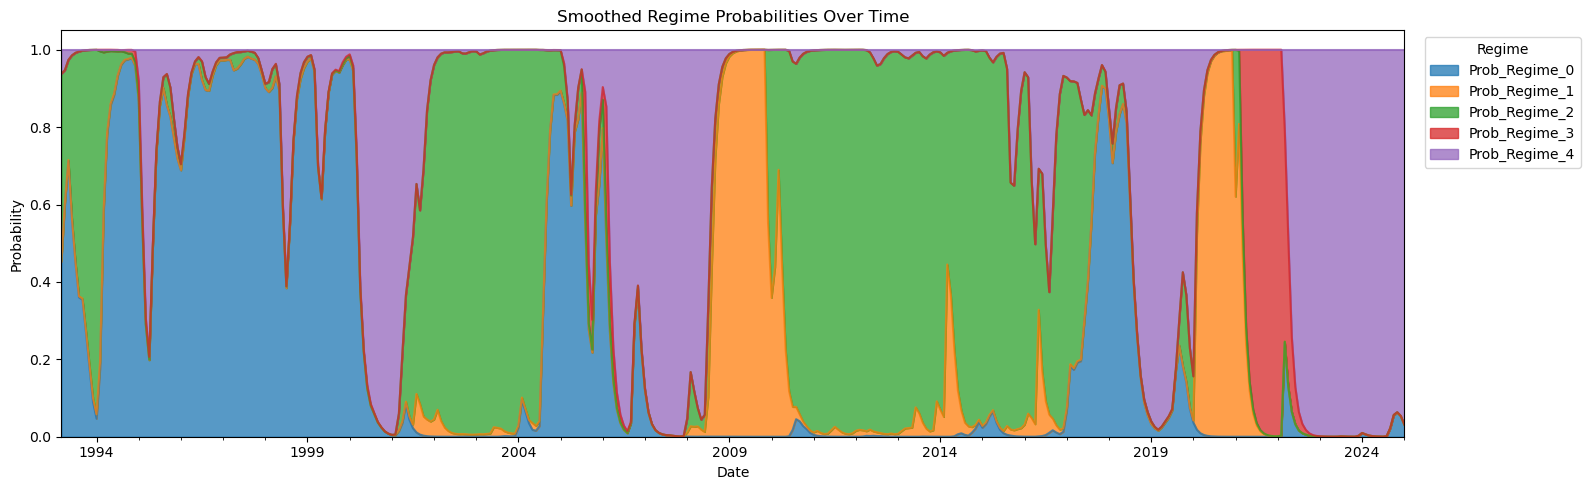

In [27]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 1. Load composite regime scores
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# 2. Optional: Smooth leading and coincident scores
df["LeadingScore_Smooth"] = df["LeadingScore"].rolling(3, center=True).mean()
df["CoincidentScore_Smooth"] = df["CoincidentScore"].rolling(3, center=True).mean()

# 3. Compute directional and relational features (smoothed)
df["LeadMinusCoin"] = df["LeadingScore_Smooth"] - df["CoincidentScore_Smooth"]
df["LeadMomentum"] = df["LeadingScore_Smooth"].diff()
df["CoinMomentum"] = df["CoincidentScore_Smooth"].diff()

# 4. Drop rows with missing values from smoothing/diff
df.dropna(inplace=True)

# 5. Fit GMM with improved, smoother features
features = ["LeadingScore_Smooth", "CoincidentScore_Smooth", "LeadMinusCoin", "LeadMomentum", "CoinMomentum"]
X = df[features]
gmm = GaussianMixture(n_components=5, random_state=42)
df["Regime"] = gmm.fit_predict(X)

# 6. Soft probabilities
proba = gmm.predict_proba(X)
for i in range(5):
    df[f"Prob_Regime_{i}"] = proba[:, i]

# 7. Optional: Smooth the probabilities (EWMA)
proba_cols = [f"Prob_Regime_{i}" for i in range(5)]
proba_smoothed = df[proba_cols].ewm(span=3).mean()

# 8. Max probability for regime certainty
df["MaxProb"] = df[proba_cols].max(axis=1)

# 9. Add regime label mapping (based on your fingerprint interpretation)
regime_labels = {
    0: "Late Cycle",
    1: "Early Recovery",
    2: "Overheat",
    3: "Expansion",
    4: "Shock Recovery"
}
df["Regime_Label"] = df["Regime"].map(regime_labels)

# 10. Plot smoothed regime probabilities
plt.figure(figsize=(16, 5))
proba_smoothed.plot(
    kind="area",
    stacked=True,
    alpha=0.75,
    figsize=(16, 5),
    title="Smoothed Regime Probabilities Over Time"
)
plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend(title="Regime", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


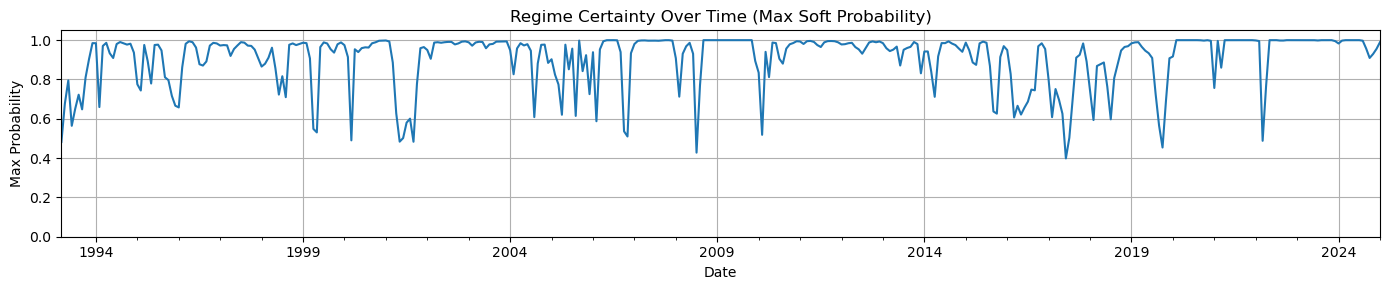

In [29]:
plt.figure(figsize=(14, 3))
df["MaxProb"].plot(title="Regime Certainty Over Time (Max Soft Probability)")
plt.ylim(0, 1.05)
plt.ylabel("Max Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
from sklearn.mixture import GaussianMixture

bic_scores = []
for k in range(2, 8):  # Test 2 to 7 regimes
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    bic_scores.append((k, gmm.bic(X)))

# Display BIC scores
for k, bic in bic_scores:
    print(f"{k} Regimes - BIC: {bic:.2f}")


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

2 Regimes - BIC: -2016.12
3 Regimes - BIC: -1907.48
4 Regimes - BIC: -1825.39
5 Regimes - BIC: -1731.24
6 Regimes - BIC: -1672.40
7 Regimes - BIC: -1570.14


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



📊 Regime Fingerprints:
        LeadingScore_Smooth  CoincidentScore_Smooth  LeadMinusCoin  \
Regime                                                               
0                     11.15                   15.39          -4.24   
1                     12.49                   14.86          -2.37   
2                     10.89                   16.47          -5.59   
3                     12.39                   12.39           0.00   
4                     12.15                   18.83          -6.68   
5                     12.17                   16.11          -3.94   

        LeadMomentum  CoinMomentum  
Regime                              
0               0.02         -0.06  
1               0.03         -0.00  
2              -0.13         -0.12  
3               0.09          0.03  
4              -0.05          0.28  
5              -0.02          0.02  


<Figure size 1600x500 with 0 Axes>

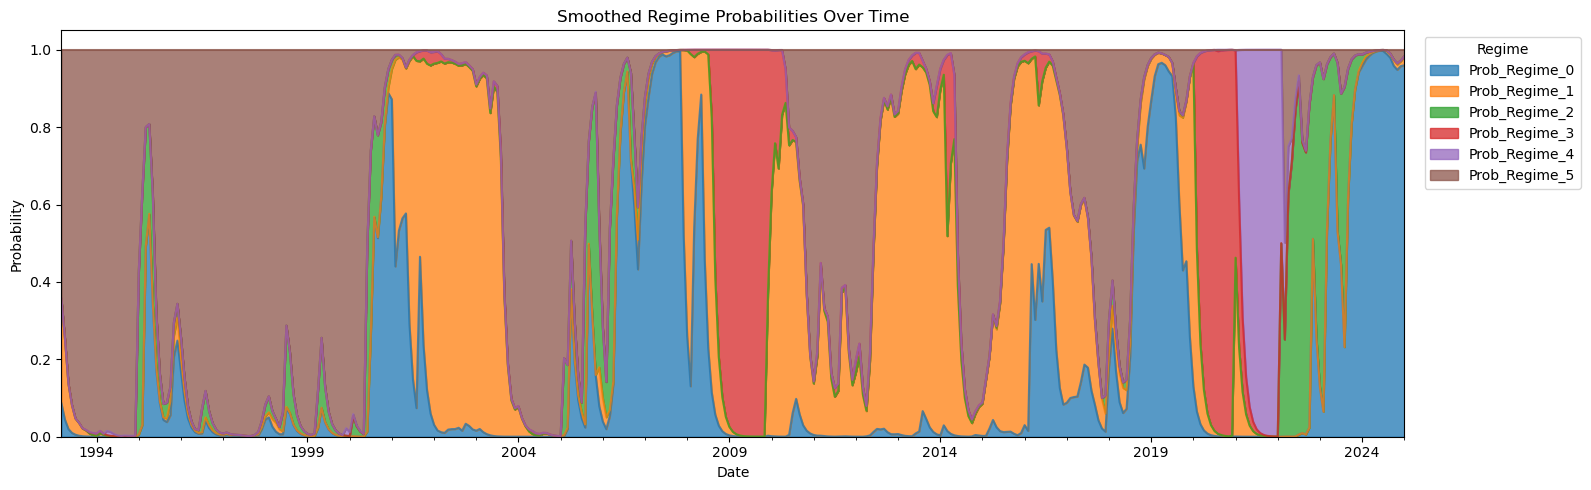

In [71]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load composite data
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Smooth inputs
df["LeadingScore_Smooth"] = df["LeadingScore"].rolling(3, center=True).mean()
df["CoincidentScore_Smooth"] = df["CoincidentScore"].rolling(3, center=True).mean()

# Feature engineering
df["LeadMinusCoin"] = df["LeadingScore_Smooth"] - df["CoincidentScore_Smooth"]
df["LeadMomentum"] = df["LeadingScore_Smooth"].diff()
df["CoinMomentum"] = df["CoincidentScore_Smooth"].diff()

# Drop NA rows from rolling/diff
df.dropna(inplace=True)

# Select features
features = ["LeadingScore_Smooth", "CoincidentScore_Smooth", "LeadMinusCoin", "LeadMomentum", "CoinMomentum"]
X = df[features]

# Fit GMM with 6 regimes
gmm = GaussianMixture(n_components=6, random_state=42)
df["Regime"] = gmm.fit_predict(X)

# Add soft probabilities
proba = gmm.predict_proba(X)
for i in range(6):
    df[f"Prob_Regime_{i}"] = proba[:, i]

# Optional: Smooth probabilities
proba_cols = [f"Prob_Regime_{i}" for i in range(6)]
df[proba_cols] = df[proba_cols].ewm(span=3).mean()

# Add max probability (confidence)
df["MaxProb"] = df[proba_cols].max(axis=1)

# Inspect fingerprints
print("\n📊 Regime Fingerprints:")
print(df.groupby("Regime")[features].mean().round(2))

# Example regime name mapping (adjust based on fingerprint means)
regime_labels = {
    0: "Expansion",
    1: "Early Recovery",
    2: "Late Cycle",
    3: "Crisis",
    4: "Shock Recovery",
    5: "Stagnation"
}
df["Regime_Label"] = df["Regime"].map(regime_labels)

# Plot soft probabilities
plt.figure(figsize=(16, 5))
df[proba_cols].plot(
    kind="area",
    stacked=True,
    alpha=0.75,
    figsize=(16, 5),
    title="Smoothed Regime Probabilities Over Time"
)
plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend(title="Regime", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [31]:
regime_labels = {
    0: "Late Cycle",
    1: "Early Recovery",
    2: "Crisis",
    3: "Expansion",
    4: "Shock Recovery",
    5: "Stagnation"
}
df["Regime_Label"] = df["Regime"].map(regime_labels)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



📊 Regime Fingerprints:
        LeadingScore_Smooth  CoincidentScore_Smooth  LeadMinusCoin  \
Regime                                                               
0                     11.15                   15.39          -4.24   
1                     12.49                   14.86          -2.37   
2                     10.89                   16.47          -5.59   
3                     12.39                   12.39           0.00   
4                     12.15                   18.83          -6.68   
5                     12.17                   16.11          -3.94   

        LeadMomentum  CoinMomentum  
Regime                              
0               0.02         -0.06  
1               0.03         -0.00  
2              -0.13         -0.12  
3               0.09          0.03  
4              -0.05          0.28  
5              -0.02          0.02  


<Figure size 1600x500 with 0 Axes>

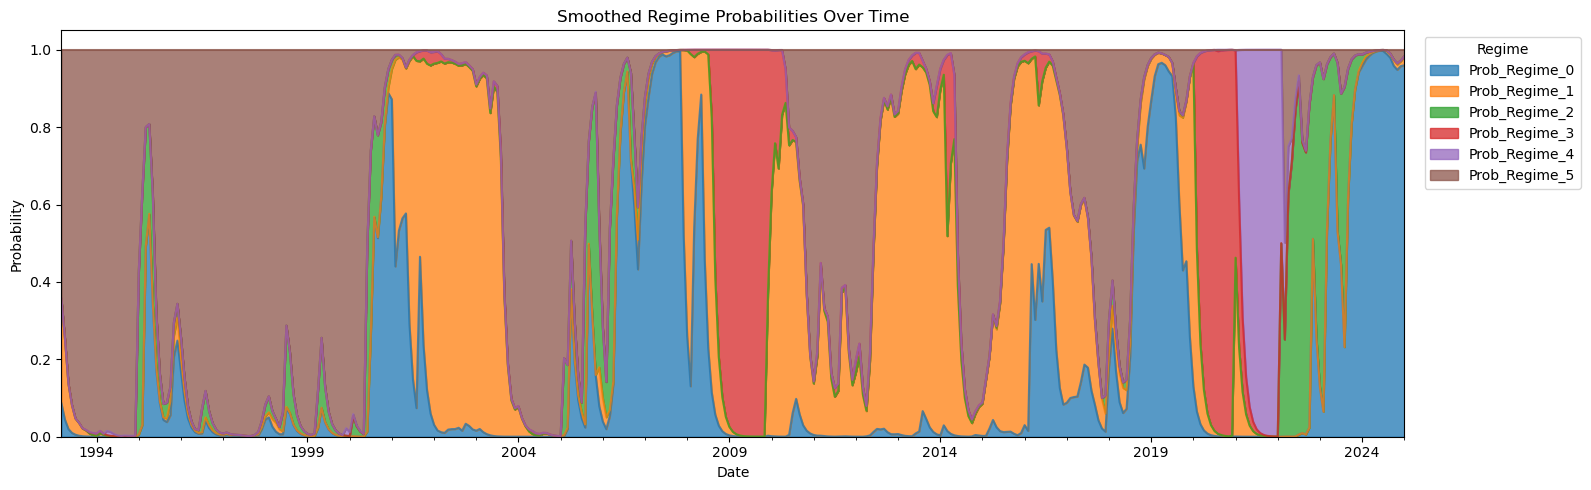

In [79]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load composite data
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Smooth inputs
df["LeadingScore_Smooth"] = df["LeadingScore"].rolling(3, center=True).mean()
df["CoincidentScore_Smooth"] = df["CoincidentScore"].rolling(3, center=True).mean()

# Feature engineering
df["LeadMinusCoin"] = df["LeadingScore_Smooth"] - df["CoincidentScore_Smooth"]
df["LeadMomentum"] = df["LeadingScore_Smooth"].diff()
df["CoinMomentum"] = df["CoincidentScore_Smooth"].diff()

# Drop NA rows from rolling/diff
df.dropna(inplace=True)

# Select features
features = ["LeadingScore_Smooth", "CoincidentScore_Smooth", "LeadMinusCoin", "LeadMomentum", "CoinMomentum"]
X = df[features]

# Fit GMM with 6 regimes
gmm = GaussianMixture(n_components=6, random_state=42)
df["Regime"] = gmm.fit_predict(X)

# Add soft probabilities
proba = gmm.predict_proba(X)
for i in range(6):
    df[f"Prob_Regime_{i}"] = proba[:, i]

# Optional: Smooth probabilities
proba_cols = [f"Prob_Regime_{i}" for i in range(6)]
df[proba_cols] = df[proba_cols].ewm(span=3).mean()

# Add max probability (confidence)
df["MaxProb"] = df[proba_cols].max(axis=1)

# Inspect fingerprints
print("\n📊 Regime Fingerprints:")
print(df.groupby("Regime")[features].mean().round(2))

# Final regime name mapping based on fingerprint interpretation
regime_labels = {
    0: "Late Cycle",         # High Coin, cooling Lead
    1: "Early Recovery",     # Lead rising, Coin catching up
    2: "Crisis",             # Both very low, negative momentum
    3: "Expansion",          # Balanced Lead/Coin with growth
    4: "Shock Recovery",     # Big Coin surge, Lead still weak
    5: "Stagnation"          # Flat, low momentum
}
df["Regime_Label"] = df["Regime"].map(regime_labels)

# Plot smoothed soft probabilities
plt.figure(figsize=(16, 5))
df[proba_cols].plot(
    kind="area",
    stacked=True,
    alpha=0.75,
    figsize=(16, 5),
    title="Smoothed Regime Probabilities Over Time"
)

plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend(title="Regime", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [35]:
# 1. Select only the probability columns
proba_cols = [f"Prob_Regime_{i}" for i in range(6)]

# 2. Add Regime_Label and Date for clarity
df_export = df[proba_cols].copy()
df_export["Most_Likely_Regime"] = df["Regime_Label"]

# 3. Export to CSV
df_export.to_csv("regime_probabilities_output.csv")

print("✅ Regime probability CSV exported as 'regime_probabilities_output.csv'")


KeyError: "['Prob_Regime_5'] not in index"

In [ ]:
# Find the regime with highest probability per row
df_export["Top_Prob_Value"] = df_export[proba_cols].max(axis=1)
df_export["Top_Prob_Regime"] = df_export[proba_cols].idxmax(axis=1)

# See the most confident regime periods
print(df_export.sort_values("Top_Prob_Value", ascending=False).head(10))



In [102]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load your composite data
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Smooth the input scores
df["LeadingScore_Smooth"] = df["LeadingScore"].rolling(3, center=True).mean()
df["CoincidentScore_Smooth"] = df["CoincidentScore"].rolling(3, center=True).mean()

# Create additional features
df["LeadMinusCoin"] = df["LeadingScore_Smooth"] - df["CoincidentScore_Smooth"]
df["LeadMomentum"] = df["LeadingScore_Smooth"].diff()
df["CoinMomentum"] = df["CoincidentScore_Smooth"].diff()
df.dropna(inplace=True)

# Fit Gaussian Mixture Model with 6 regimes
features = ["LeadingScore_Smooth", "CoincidentScore_Smooth", "LeadMinusCoin", "LeadMomentum", "CoinMomentum"]
X = df[features]
gmm = GaussianMixture(n_components=6, random_state=42)
df["Regime"] = gmm.fit_predict(X)

# Add soft probabilities
proba = gmm.predict_proba(X)
for i in range(6):
    df[f"Prob_Regime_{i}"] = proba[:, i]

# Smooth soft probabilities
proba_cols = [f"Prob_Regime_{i}" for i in range(6)]
df[proba_cols] = df[proba_cols].ewm(span=3).mean()

# Add regime labels
regime_labels = {
    0: "Late_Cycle",
    1: "Early_Recovery",
    2: "Crisis",
    3: "Expansion",
    4: "Shock_Recovery",
    5: "Stagnation"
}
df["Regime_Label"] = df["Regime"].map(regime_labels)

# Rename probability columns
rename_dict = {f"Prob_Regime_{i}": f"Prob_{regime_labels[i]}" for i in range(6)}
df.rename(columns=rename_dict, inplace=True)

# Format probabilities as percentage strings with 2 decimal places
for col in rename_dict.values():
    df[col] = (df[col] * 100).map(lambda x: f"{x:.2f}%")

# Save the final version to CSV
df.to_csv("regime_model_labeled_percentage.csv")
print("✅ Exported 'regime_model_labeled_percentage.csv' with labeled probability columns in percentage format.")



✅ Exported 'regime_model_labeled_percentage.csv' with labeled probability columns in percentage format.


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [99]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load the composite score data
df = pd.read_csv("individual_scaled_scores.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# 1. Smooth scores
df["LeadingScore_Smooth"] = df["LeadingScore"].rolling(3, center=True).mean()
df["CoincidentScore_Smooth"] = df["CoincidentScore"].rolling(3, center=True).mean()

# 2. Feature engineering
df["LeadMinusCoin"] = df["LeadingScore_Smooth"] - df["CoincidentScore_Smooth"]
df["LeadMomentum"] = df["LeadingScore_Smooth"].diff()
df["CoinMomentum"] = df["CoincidentScore_Smooth"].diff()
df.dropna(inplace=True)

# 3. Fit GMM with 6 regimes
X = df[["LeadingScore_Smooth", "CoincidentScore_Smooth", "LeadMinusCoin", "LeadMomentum", "CoinMomentum"]]
gmm = GaussianMixture(n_components=6, random_state=42)
df["Regime"] = gmm.fit_predict(X)

# 4. Soft clustering probabilities
proba = gmm.predict_proba(X)
for i in range(6):
    df[f"Prob_Regime_{i}"] = proba[:, i]

# 5. Smooth probabilities
proba_cols = [f"Prob_Regime_{i}" for i in range(6)]
df[proba_cols] = df[proba_cols].ewm(span=3).mean()
df["MaxProb"] = df[proba_cols].max(axis=1)

# 6. Assign human-readable labels to regimes
regime_labels = {
    0: "Late_Cycle",
    1: "Early_Recovery",
    2: "Crisis",
    3: "Expansion",
    4: "Shock_Recovery",
    5: "Stagnation"
}
df["Regime_Label"] = df["Regime"].map(regime_labels)

# 7. Rename probability columns to their descriptive regime names
rename_dict = {f"Prob_Regime_{i}": f"Prob_{regime_labels[i]}" for i in range(6)}
df.rename(columns=rename_dict, inplace=True)

# 8. Save final clean CSV
df.to_csv("regime_models_labeled.csv")
print("✅ Exported 'regime_model_labeled.csv' with descriptive probability column titles.")


✅ Exported 'regime_model_labeled.csv' with descriptive probability column titles.


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
